In [13]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Create a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


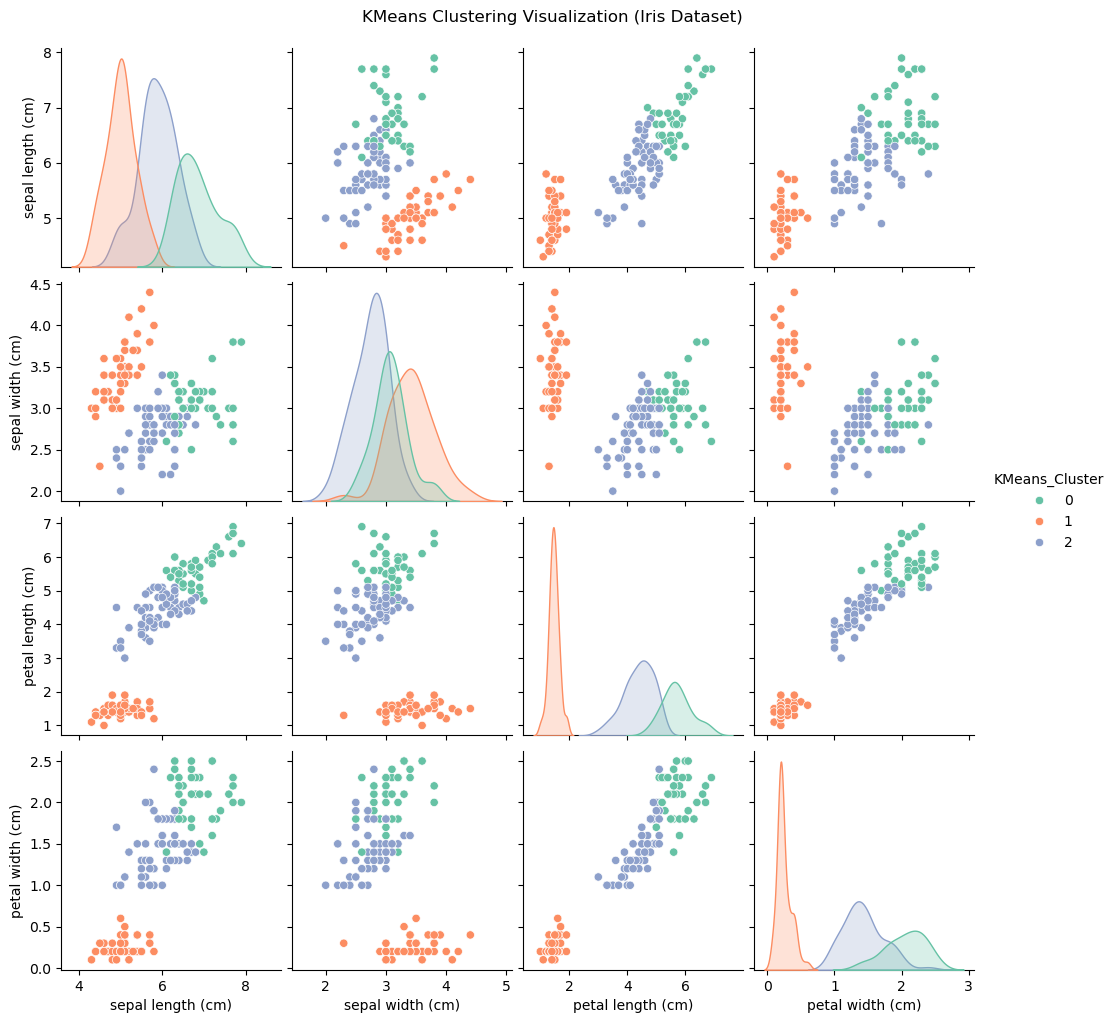

In [3]:
from sklearn.cluster import KMeans

# Applying KMeans with 3 clusters (since Iris dataset has 3 classes)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Add cluster labels to the DataFrame
df['KMeans_Cluster'] = kmeans.labels_

# Visualizing clusters using a pairplot
sns.pairplot(df, hue='KMeans_Cluster', palette='Set2')
plt.suptitle("KMeans Clustering Visualization (Iris Dataset)", y=1.02)
plt.show()


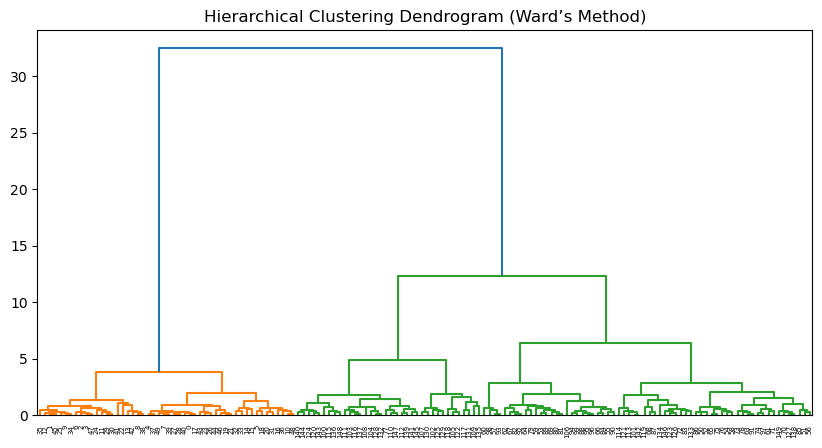

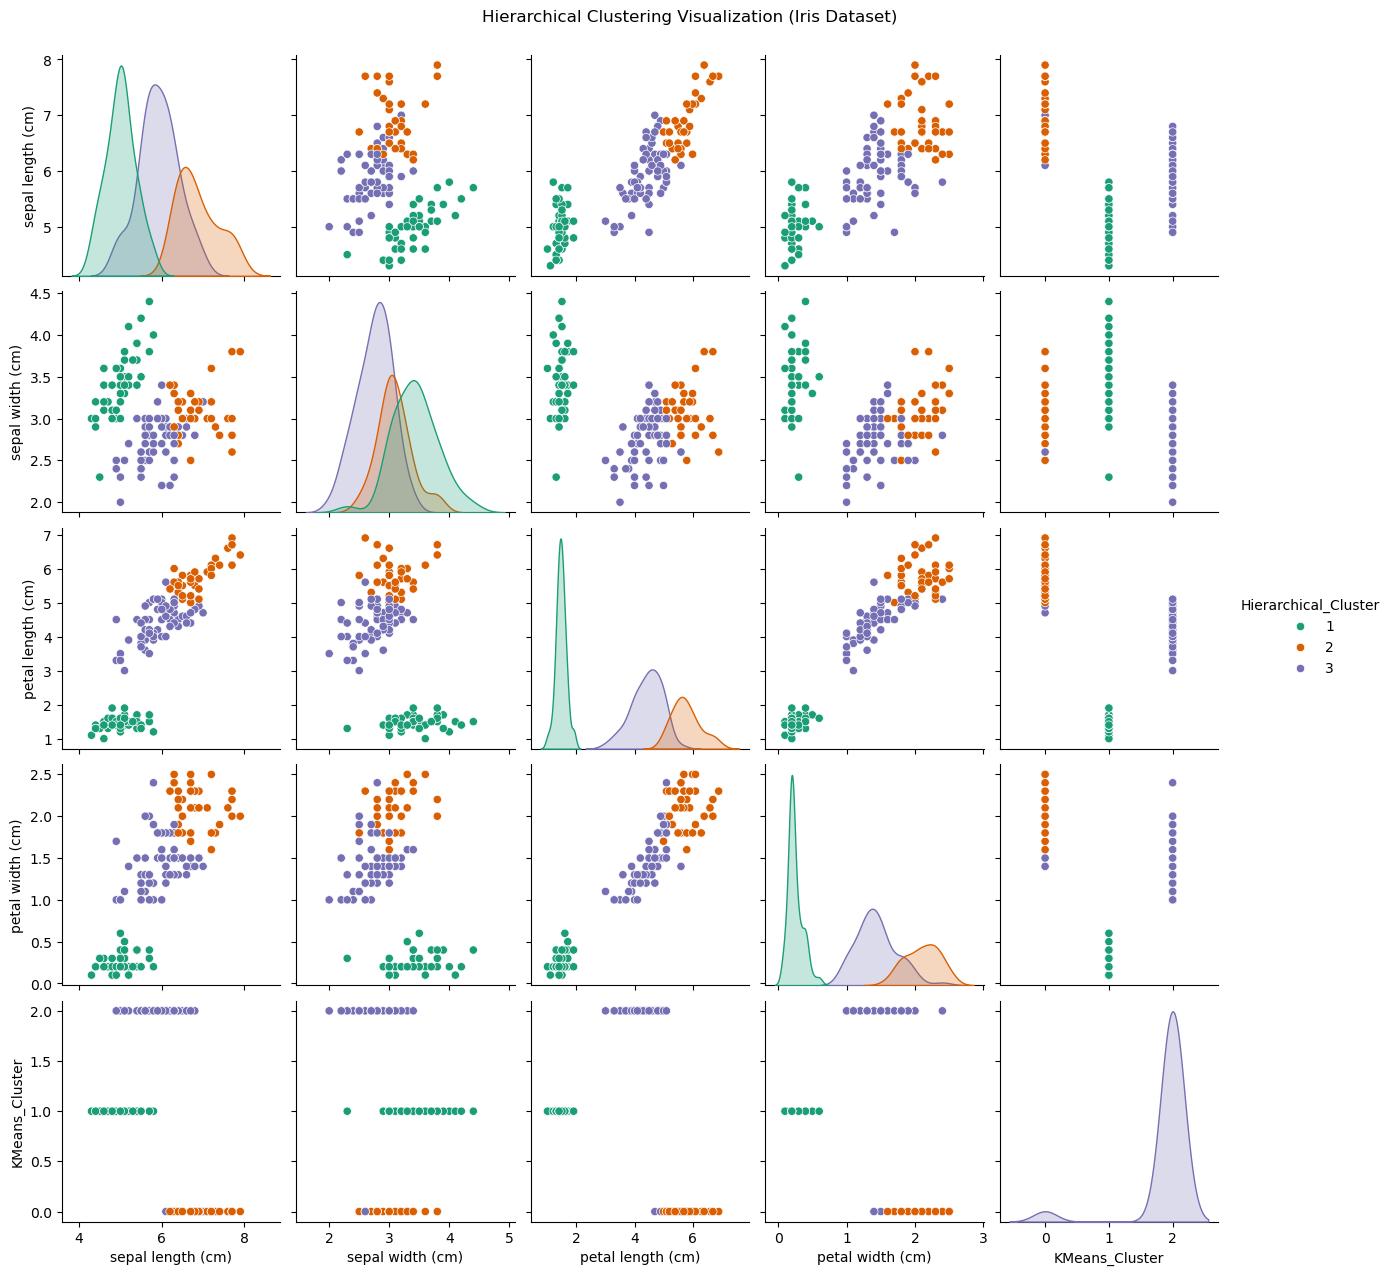

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(df.iloc[:, :-1], method='ward')

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Ward’s Method)')
plt.show()

# Forming 3 clusters for better comparison with KMeans
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Visualizing clusters using a pairplot
sns.pairplot(df, hue='Hierarchical_Cluster', palette='Dark2')
plt.suptitle("Hierarchical Clustering Visualization (Iris Dataset)", y=1.02)
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(df.iloc[:, :-2], kmeans.labels_)
print("KMeans Silhouette Score:", kmeans_silhouette)

KMeans Silhouette Score: 0.551191604619592


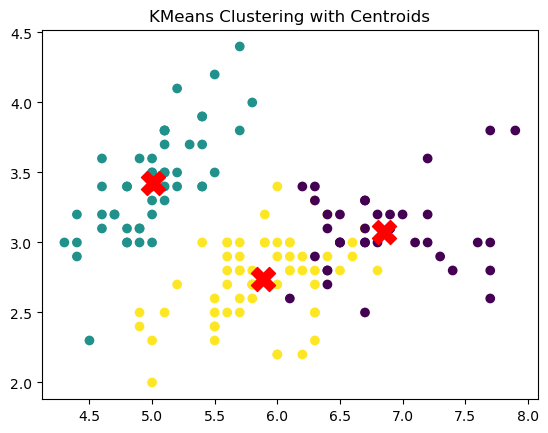

In [9]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('KMeans Clustering with Centroids')
plt.show()
